## Exercise set 5: causal forest

In this exercise set we will be working with the `econml` package to estimate a causal forest.

Another more general implementation is found in [generalized random forest](https://github.com/grf-labs/grf) by Athey et al. The package is written for the R programming language.

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.datasets import make_classification

sns.set(style='darkgrid')

%matplotlib inline

To highlight the usefulness of causal forest we will be working with synthetic data in this exercise. In particular we will synthetically add a treatment effect to a dataset in which there otherwise is none. Furthermore we will make this effect heterogeneous by adding noise, and by making it depend on a single continuous variable as well as a categorical variable. 

>**Ex. 5.1.0:** Use the code below to simulate data according to
<br>
<br>
\begin{align}
T(X) &= \frac{1}{1+e^{-X\delta+U}} > 0.5 \\ 
\tau(X) &=  \frac{1}{1+e^{-\gamma X_0}} \\
Y(T=0) &= X\beta + \epsilon \\         
Y(T=1) &= Y(0) + \tau(X) \\ 
\end{align}
<br>
where $\epsilon, \nu$ are simply noise terms distributed according to $\mathcal{N}(0,1)$ and $\beta,\delta$ are `N_FEATURES` vector of random parameters. $\gamma$ is a scalar parameter.


In [2]:
N_SAMPLES = 10000
N_FEATURES = 5
GAMMA = 1.2
BETA = np.random.RandomState(0).uniform(0,1, size = N_FEATURES)
DELTA = np.random.RandomState(1).uniform(0,1, size = N_FEATURES)

X = np.random.RandomState(2).normal(size = (N_SAMPLES, N_FEATURES))

U = np.random.RandomState(3).normal(size = (N_SAMPLES))
T = 1/(1+np.exp(-(U+X.dot(DELTA))))>.5

       
Y0 = X @ BETA + np.random.RandomState(5).normal(size = N_SAMPLES)
tau = 10/(1 + np.exp(-GAMMA*X[:,0])) + np.random.normal(size = N_SAMPLES)
Y1 = Y0 + tau
y = Y0 + T*(Y1 - Y0)

> **Ex. 5.1.1:** Create a two-subplot figure, and plot $Y(0)$ and $Y(1)$ in one subplot against $X_0$. Plot $\tau(x)$ against $X_0$ in the other subplot. What do you see? Why do we observe $\tau=0$ in many cases?

In [3]:
# Your answer here

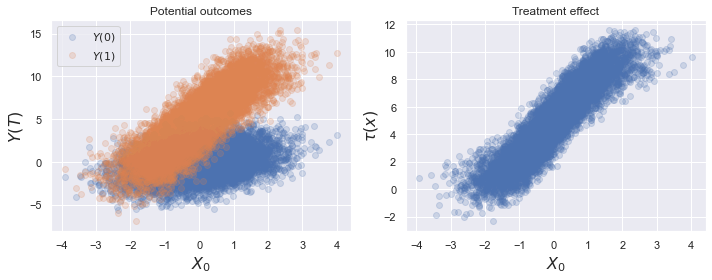

In [4]:
fig, ax = plt.subplots(1,2, figsize = (10,4))

ax[0].scatter(X[:,0], Y0, label = '$Y(0)$',alpha=.2)
ax[0].scatter(X[:,0], Y1, label = '$Y(1)$',alpha=.2)
ax[0].set_xlabel('$X_0$', fontsize = 16)
ax[0].set_ylabel('$Y(T)$', fontsize = 16)
ax[0].legend()
ax[0].grid(True)
ax[0].set_title('Potential outcomes')

ax[1].scatter(X[:,0], tau, label = '\tau(x)',alpha=.2)
ax[1].set_xlabel('$X_0$', fontsize = 16)
ax[1].set_ylabel('$\\tau(x)$', fontsize = 16)
ax[1].grid(True)
ax[1].set_title('Treatment effect')

fig.tight_layout()

> **Ex. 5.1.2:** Is there a selection problem? Plot for each dimension of $X$ the relationship with treatment assignment.

In [70]:
# Your answer here

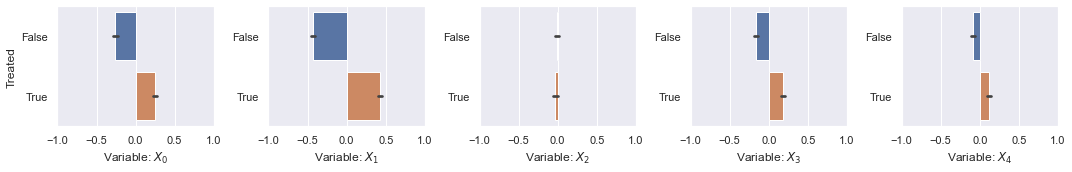

In [8]:
fig, ax = plt.subplots(1,5, figsize = (15,2.5))

for i in range(N_FEATURES):

    sns.barplot(y=T, x=X[:,i], ax=ax[i], orient='h')
    ax[i].set_xlim(-1,1)
    ax[i].set_xlabel(f'Variable: $X_{i}$')
    
ax[0].set_ylabel('Treated')

fig.tight_layout()

>**Ex.5.1.3:** Estimate a causal forest model using the `econml` package, and store the model in a new variable `cf`. To unconfound the treatment assignment, use the gradient boosted forest. Then use the following line to create a dataframe of predicted treatment effects on the same data that you trained the model on. 
>> Hint: use the following setting 
>>```python
discrete_treatment=True
```

In [70]:
# Your answer here

In [9]:
t0,t1 = 0,1
from econml.dml import CausalForestDML
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
cf_dmlxg = CausalForestDML(model_y=GradientBoostingRegressor(),
                           model_t=GradientBoostingClassifier(),
                           discrete_treatment=True)
cf_dmlxg.fit(y, T, X=X)

>**Ex.5.1.4:** Plot a scatterplot of the estimated individual treatment effects against the simulated "true" ITE's `tau` that you produced in the beginning of this exercise set.

In [70]:
# Your answer here

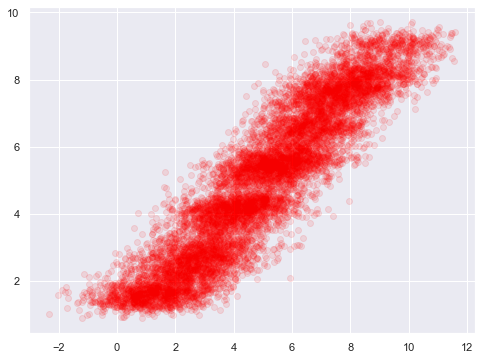

In [10]:
tau_hat = cf_dmlxg.effect(X)
tau_lb, tau_ub = cf_dmlxg.effect_interval(X, alpha=0.05)


from matplotlib import pyplot as plt
%matplotlib inline
f,ax = plt.subplots(figsize=(8,6))
ax.scatter(tau, tau_hat, color='red',alpha=0.1)
# plt.plot(X_range[:,0], tau_hat)
#ax.fill_between(tau, tau_lb, tau_ub)